link del repositorio
https://github.com/BrendaGonzales757/lab2

REGRESION MULTIVARIABLE

Importamos librerias

In [ ]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import pandas as pd

leemos el csv

In [ ]:
data = pd.read_csv('/content/US_births(2018).csv', delimiter=';')

separamos las columnas en los valores de x y y

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
m = y.size

Normalizamos los x

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

llamamos a la funcion que normaliza x

In [ ]:
X_norm, mu, sigma = featureNormalize(X)


agregamos los valores de 1

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [1]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

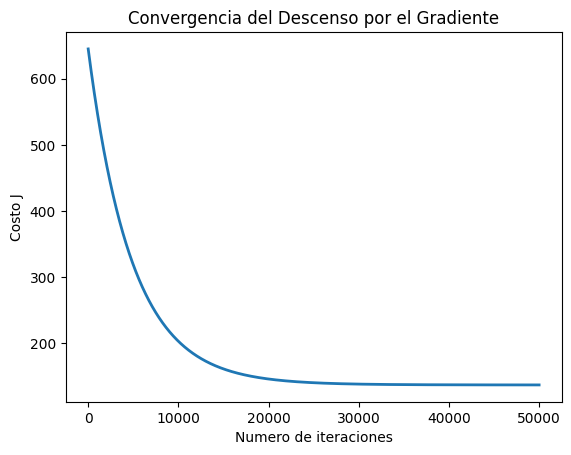

In [ ]:
alpha = 0.0001
num_iters = 50000
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show()

In [ ]:
X_prediccion = pd.read_csv('/content/X_array.csv', delimiter=';')
m1 = X_prediccion.shape[0]
print(m1)
X_prediccion[:] = (X_prediccion[:] - mu) / sigma
X_prediccion = np.concatenate([np.ones((m1, 1)), X_prediccion], axis=1)
print(f'Shape of X_prediccion: {X_prediccion.shape}')
print(f'Shape of theta: {theta.shape}')

for i in range(m1):
  X_array = X_prediccion[i, :]
  predic = np.dot(X_array, theta)
  print('Prueba de prediccion ', i+1, ': {:.0f}'.format(predic))

100
Shape of X_prediccion: (100, 11)
Shape of theta: (11,)
Prueba de prediccion  1 : 32
Prueba de prediccion  2 : 28
Prueba de prediccion  3 : 23
Prueba de prediccion  4 : 34
Prueba de prediccion  5 : 23
Prueba de prediccion  6 : 31
Prueba de prediccion  7 : 33
Prueba de prediccion  8 : 42
Prueba de prediccion  9 : 27
Prueba de prediccion  10 : 37
Prueba de prediccion  11 : 31
Prueba de prediccion  12 : 22
Prueba de prediccion  13 : 25
Prueba de prediccion  14 : 27
Prueba de prediccion  15 : 27
Prueba de prediccion  16 : 26
Prueba de prediccion  17 : 26
Prueba de prediccion  18 : 26
Prueba de prediccion  19 : 32
Prueba de prediccion  20 : 23
Prueba de prediccion  21 : 28
Prueba de prediccion  22 : 30
Prueba de prediccion  23 : 26
Prueba de prediccion  24 : 24
Prueba de prediccion  25 : 32
Prueba de prediccion  26 : 32
Prueba de prediccion  27 : 14
Prueba de prediccion  28 : 30
Prueba de prediccion  29 : 24
Prueba de prediccion  30 : 24
Prueba de prediccion  31 : 26
Prueba de prediccion

ECUACION DE LA NORMAL

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/US_births(2018).csv', delimiter=';')

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
m = y.size

In [ ]:
print(X.head())

   DBWT  DWgt_R  FAGECOMB  ILLB_R  ILOP_R  ILP_R  MAGER  M_Ht_In  PREVIS  \
0  3657     231        31      16      33     16     30       66       8   
1  3242     185        35     180     888    180     35       63       9   
2  3470     273        31     999     888    999     28       71      17   
3  3140     138        26      43     888     43     23       64       6   
4  2125     219        35     999     999    999     37       66      15   

   PWgt_R  
0     190  
1     188  
2     215  
3     138  
4     220  


In [ ]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [ ]:
theta = normalEqn(X, y)

X_prediccion = pd.read_csv('/content/X_array.csv', delimiter=';')
m1 = X_prediccion.shape[0]
print(m1)
X_prediccion = np.concatenate([np.ones((m1, 1)), X_prediccion], axis=1)


for i in range(m1):
  X_array = X_prediccion[i, :]
  predic = np.dot(X_array, theta)
  print('Prueba de prediccion ', i+1, ': {:.0f}'.format(predic))

100
Prueba de prediccion  1 : 32
Prueba de prediccion  2 : 29
Prueba de prediccion  3 : 23
Prueba de prediccion  4 : 35
Prueba de prediccion  5 : 24
Prueba de prediccion  6 : 31
Prueba de prediccion  7 : 33
Prueba de prediccion  8 : 42
Prueba de prediccion  9 : 27
Prueba de prediccion  10 : 37
Prueba de prediccion  11 : 31
Prueba de prediccion  12 : 22
Prueba de prediccion  13 : 25
Prueba de prediccion  14 : 27
Prueba de prediccion  15 : 27
Prueba de prediccion  16 : 27
Prueba de prediccion  17 : 26
Prueba de prediccion  18 : 26
Prueba de prediccion  19 : 33
Prueba de prediccion  20 : 24
Prueba de prediccion  21 : 28
Prueba de prediccion  22 : 30
Prueba de prediccion  23 : 26
Prueba de prediccion  24 : 24
Prueba de prediccion  25 : 33
Prueba de prediccion  26 : 33
Prueba de prediccion  27 : 15
Prueba de prediccion  28 : 30
Prueba de prediccion  29 : 24
Prueba de prediccion  30 : 24
Prueba de prediccion  31 : 26
Prueba de prediccion  32 : 31
Prueba de prediccion  33 : 24
Prueba de predi

REGRESION POLINOMIAL

In [ ]:
data = pd.read_csv('/content/US_births(2018).csv', delimiter=";")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198414 entries, 0 to 198413
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   DBWT      198414 non-null  int64
 1   DWgt_R    198414 non-null  int64
 2   FAGECOMB  198414 non-null  int64
 3   ILLB_R    198414 non-null  int64
 4   ILOP_R    198414 non-null  int64
 5   ILP_R     198414 non-null  int64
 6   MAGER     198414 non-null  int64
 7   M_Ht_In   198414 non-null  int64
 8   PREVIS    198414 non-null  int64
 9   PWgt_R    198414 non-null  int64
 10  WTGAIN    198414 non-null  int64
dtypes: int64(11)
memory usage: 16.7 MB


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
m = y.size

In [ ]:
print(X)
print(y)
print(m)

        DBWT  DWgt_R  FAGECOMB  ILLB_R  ILOP_R  ILP_R  MAGER  M_Ht_In  PREVIS  \
0       3657     231        31      16      33     16     30       66       8   
1       3242     185        35     180     888    180     35       63       9   
2       3470     273        31     999     888    999     28       71      17   
3       3140     138        26      43     888     43     23       64       6   
4       2125     219        35     999     999    999     37       66      15   
...      ...     ...       ...     ...     ...    ...    ...      ...     ...   
198409  3745     188        37      52     888     52     33       65      12   
198410  3550     185        34      57     888     57     33       68      11   
198411  3960     181        39      76     888     76     37       63      20   
198412  3230     177        38      43     888     43     33       63      11   
198413  3000     181        41     888     888    888     37       64      11   

        PWgt_R  
0         

In [ ]:
X = np.concatenate([X, X * X], axis=1)

In [ ]:
print(X)

[[ 3657   231    31 ...  4356    64 36100]
 [ 3242   185    35 ...  3969    81 35344]
 [ 3470   273    31 ...  5041   289 46225]
 ...
 [ 3960   181    39 ...  3969   400 26896]
 [ 3230   177    38 ...  3969   121 30276]
 [ 3000   181    41 ...  4096   121 25600]]


In [ ]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 198414
Número de columnas: 20


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 3657   231    31 ...  4356    64 36100]
 [ 3242   185    35 ...  3969    81 35344]
 [ 3470   273    31 ...  5041   289 46225]
 ...
 [ 3960   181    39 ...  3969   400 26896]
 [ 3230   177    38 ...  3969   121 30276]
 [ 3000   181    41 ...  4096   121 25600]]
Media calculada: [3.25325594e+03 1.99381505e+02 4.08717328e+01 3.70797716e+02
 7.37949651e+02 3.63897512e+02 2.79942040e+01 6.42187446e+01
 1.16813279e+01 1.72649949e+02 1.09570358e+07 4.86619592e+04
 2.29705264e+03 3.06308130e+05 6.53463626e+05 3.07706599e+05
 8.17218926e+02 4.13580956e+03 2.41981004e+02 4.08092173e+04]
Desviación estandar calculada: [6.11033200e+02 9.43873641e+01 2.50310625e+01 4.10873683e+02
 3.29990816e+02 4.18670753e+02 5.79167216e+00 3.42963497e+00
 1.02726619e+01 1.04886665e+02 4.13193913e+06 1.01667654e+05
 3.15481785e+03 3.86170748e+05 3.13184883e+05 3.99255658e+05
 3.34793571e+02 4.80620925e+02 1.03709895e+03 1.11922395e+05]
[[ 0.66075634  0.33498652 -0.3943793  ...  0.45813744 -0.17161429
  -0.04207

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -0.39873715 -1.44746357 ...  0.30571255 -0.78856184
  -0.08982032]
 [ 1.         -0.39873715  0.1756067  ...  0.74646654 -0.46943947
  -0.08711198]
 [ 1.         -1.47395936 -1.44746357 ...  0.1351581   0.89741533
  -0.08643145]
 ...
 [ 1.         -1.47395936 -1.77207762 ...  0.60426342 -1.01581427
  -0.09267852]
 [ 1.         -0.39873715  0.50022075 ... -1.02940117 -0.73063533
  -0.09292154]
 [ 1.         -1.47395936 -1.77207762 ...  0.60426342 -1.01581427
  -0.09290257]]


In [ ]:
def computeCostMulti(X, y, theta):

    m = y.shape[0]

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [ ]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):

    m = y.shape[0]

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [ ]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 198414
Número de columnas: 21


theta calculado por el descenso por el gradiente: [ 3.07262572e+01  1.81367724e+00  3.41066666e+00 -2.63913329e-02
  7.91885702e-01 -8.67651359e-02  8.59356957e-02 -1.20042381e-01
  8.00699990e-01  7.11153536e-01 -5.10455282e+00  7.82217138e-02
  2.61632213e+00  5.00839609e-03  7.39799504e-01 -2.79671217e-02
  9.54738160e-02 -1.07187139e-01 -1.04857281e-01 -5.24267681e-01
  9.31912156e+00]


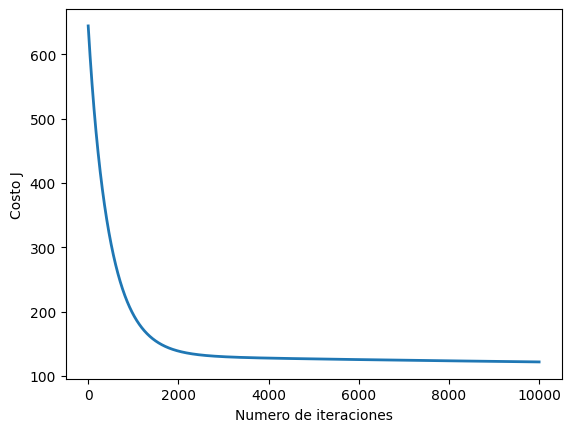

In [ ]:
alpha = 0.001
num_iters = 10000

theta = np.zeros(21)
theta, J_history = gradientDescentPoly(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [ ]:
X_prediccion = pd.read_csv('/content/X_array.csv', delimiter=';')
X_prediccion = np.concatenate([X_prediccion, X_prediccion * X_prediccion], axis=1)
m1 = X_prediccion.shape[0]
print(m1)
X_prediccion[:] = (X_prediccion[:] - mu) / sigma
X_prediccion = np.concatenate([np.ones((m1, 1)), X_prediccion], axis=1)
print(f'Shape of X_prediccion: {X_prediccion.shape}')
print(f'Shape of theta: {theta.shape}')

for i in range(m1):
  X_array = X_prediccion[i, :]

  predic = np.dot(X_array, theta)
  print('Prueba de prediccion ', i+1, ': {:.0f}'.format(predic))

100
Shape of X_prediccion: (100, 21)
Shape of theta: (21,)
Prueba de prediccion  1 : 33
Prueba de prediccion  2 : 32
Prueba de prediccion  3 : 29
Prueba de prediccion  4 : 34
Prueba de prediccion  5 : 31
Prueba de prediccion  6 : 33
Prueba de prediccion  7 : 31
Prueba de prediccion  8 : 37
Prueba de prediccion  9 : 30
Prueba de prediccion  10 : 31
Prueba de prediccion  11 : 32
Prueba de prediccion  12 : 30
Prueba de prediccion  13 : 32
Prueba de prediccion  14 : 30
Prueba de prediccion  15 : 29
Prueba de prediccion  16 : 31
Prueba de prediccion  17 : 30
Prueba de prediccion  18 : 30
Prueba de prediccion  19 : 31
Prueba de prediccion  20 : 31
Prueba de prediccion  21 : 32
Prueba de prediccion  22 : 32
Prueba de prediccion  23 : 31
Prueba de prediccion  24 : 31
Prueba de prediccion  25 : 32
Prueba de prediccion  26 : 31
Prueba de prediccion  27 : 25
Prueba de prediccion  28 : 31
Prueba de prediccion  29 : 29
Prueba de prediccion  30 : 29
Prueba de prediccion  31 : 31
Prueba de prediccion